In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rivet_plotter import RivetPlotter


Bad key "legend.title_fontsize" on line 22 in
/mt/home/jbullock/.config/matplotlib/stylelib/notebook.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
rivet_dir = '/mt/home/jbullock/www/files/research/parallel_fixed/integration_grid/3g2A-100k-unit-grid-diff-seed-3M/rivet-plots/diphoton/'

In [3]:
save_dir = './paper_plots/5_point/distributions/'

**Questions:**
- Why is this rescaling disrupting the rivet plots?

# Angular plots

## $d\phi_{jj}$

In [4]:
dphi_jj_file = rivet_dir + 'dphijj.dat'

In [5]:
dphi_jj_plotter = RivetPlotter(dphi_jj_file)

In [6]:
njet_scale, nn_scale, njet_data, nn_data = dphi_jj_plotter.extract_data()

In [7]:
njet_bins, njet_vals, njet_errs = dphi_jj_plotter.parse_data_step(njet_data)
nn_bins, nn_vals, nn_errs = dphi_jj_plotter.parse_data_step(nn_data)

In [12]:
def plot_distribution(
    njet_bins,
    nn_bins,
    njet_vals,
    nn_vals,
    njet_errs,
    nn_errs,
    ylabel,
    xlabel,
    xlim=None,
):
    """
    Plot two histograms with ratio plot below

    Returns
    -------
    matplotlib figure environment
    """

    plt.clf()

    fig = plt.figure(1, figsize=(5,7))

    plt.rc("text", usetex=True)
    plt.rc("font", family="serif")

    ax1 = fig.add_axes((0.1, 0.4, 0.8, 0.8))

    ax1.step(njet_bins, njet_vals, color="red", label="NJet")
    ax1.step(nn_bins, nn_vals, color="blue", label="NN")
    ax1.fill_between(
        njet_bins[:-1],
        (njet_vals - njet_errs)[1:],
        (njet_vals + njet_errs)[1:],
        step="post",
        color="red",
        alpha=0.5,
    )
    ax1.fill_between(
        nn_bins[:-1],
        (nn_vals - nn_errs)[1:],
        (nn_vals + nn_errs)[1:],
        step="post",
        color="blue",
        alpha=0.5,
    )
    ax1.set_yscale("log")
    ax1.set_xticklabels([])

    ax1.tick_params(axis="x", labelsize=15, direction="in", top=True)
    ax1.tick_params(
        axis="y", labelsize=15, direction="in", right=True, which="both"
    )

    if xlim is not None:
        ax1.set_xlim(xlim)
    else:
        ax1.set_xlim((0, njet_bins[-1]))

    ax1.set_ylabel(r"{}".format(ylabel), fontsize=17, labelpad=10)
    ax1.legend(prop={"size": 17}, frameon=False)

    ax2 = fig.add_axes((0.1, 0.1, 0.8, 0.3))

    ax2.step(njet_bins, np.ones(len(njet_vals)), color="red")
    ax2.step(njet_bins, nn_vals / njet_vals, color="blue")
    ax2.fill_between(
        njet_bins[:-1],
        (np.ones(len(njet_vals)) - (njet_errs / njet_vals))[1:],
        (np.ones(len(njet_vals)) + (njet_errs / njet_vals))[1:],
        step="post",
        color="red",
        alpha=0.5,
    )
    ax2.fill_between(
        nn_bins[:-1],
        ((nn_vals / njet_vals) - (nn_errs / njet_vals))[1:],
        ((nn_vals / njet_vals) + (nn_errs / njet_vals))[1:],
        step="post",
        color="blue",
        alpha=0.5,
    )

    if xlim is not None:
        ax2.set_xlim(xlim)
    else:
        ax2.set_xlim((0, njet_bins[-1]))
    ax2.set_ylim((0.4, 1.6))

    ax2.set_ylabel(r"Ratio", fontsize=17, labelpad=10)
    ax2.set_xlabel(r"{}".format(xlabel), fontsize=17, labelpad=10)
    ax2.tick_params(axis="x", labelsize=15, direction="in", top=True)
    ax2.tick_params(
        axis="y", labelsize=15, direction="in", right=True, which="both"
    )

    return fig

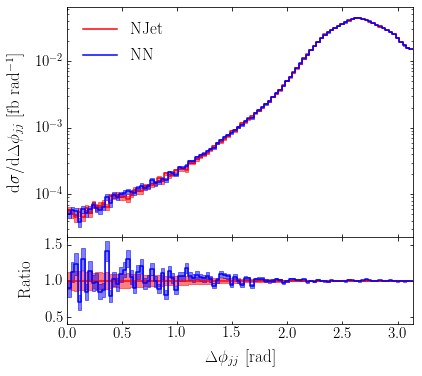

In [13]:
fig = plot_distribution(
    njet_bins = njet_bins,
    nn_bins = nn_bins,
    njet_vals = njet_vals/np.sum(njet_vals),
    nn_vals = nn_vals/np.sum(nn_vals),
    njet_errs = njet_errs/np.sum(njet_vals),
    nn_errs = nn_errs/np.sum(njet_vals),
    xlabel = '$\Delta\phi_{jj}$ [rad]',
    ylabel = 'd$\sigma/$d$\Delta\phi_{jj}$ [fb rad$^{-1}$]'
)

## $R_{j_1,\gamma_1}$

In [17]:
dr_jy_file = rivet_dir + 'rsepjy.dat'

In [18]:
dr_jy_plotter = RivetPlotter(dr_jy_file)

In [19]:
njet_scale, nn_scale, njet_data, nn_data = dr_jy_plotter.extract_data()

In [20]:
njet_bins, njet_vals, njet_errs = dr_jy_plotter.parse_data_step(njet_data)
nn_bins, nn_vals, nn_errs = dr_jy_plotter.parse_data_step(nn_data)

rivet_plotter.py:147: RuntimeWarning: invalid value encountered in divide
  ax2.step(njet_bins, nn_vals / njet_vals, color="blue")
rivet_plotter.py:150: RuntimeWarning: invalid value encountered in divide
  (np.ones(len(njet_vals)) - (njet_errs/njet_vals))[1:],
rivet_plotter.py:151: RuntimeWarning: invalid value encountered in divide
  (np.ones(len(njet_vals)) + (njet_errs/njet_vals))[1:],
rivet_plotter.py:158: RuntimeWarning: invalid value encountered in divide
  ((nn_vals / njet_vals) - (nn_errs/njet_vals))[1:],
rivet_plotter.py:159: RuntimeWarning: invalid value encountered in divide
  ((nn_vals / njet_vals) + (nn_errs/njet_vals))[1:],


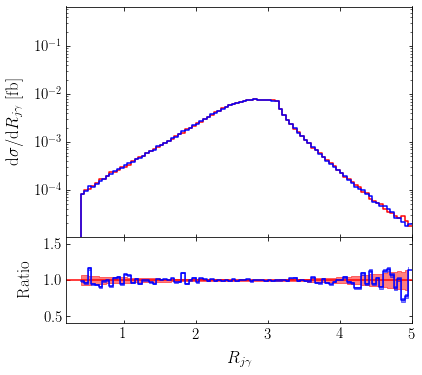

In [22]:
fig = dr_jy_plotter.plot_distribution(
    njet_bins = njet_bins,
    nn_bins = nn_bins,
    njet_vals = njet_vals/np.sum(njet_vals),
    nn_vals = nn_vals/np.sum(nn_vals),
    njet_errs = njet_errs/np.sum(njet_vals),
    nn_errs = nn_errs/np.sum(njet_vals),
    xlabel = '$R_{j\gamma}$',
    ylabel = 'd$\sigma/$d$R_{j\gamma}$ [fb]',
    xlim = (0.2,5)
)

# Di-photon plots

## $d\eta_{\gamma\gamma}$

In [49]:
deta_yy_file = rivet_dir + 'etayy.dat'

In [50]:
deta_yy_plotter = RivetPlotter(deta_yy_file)

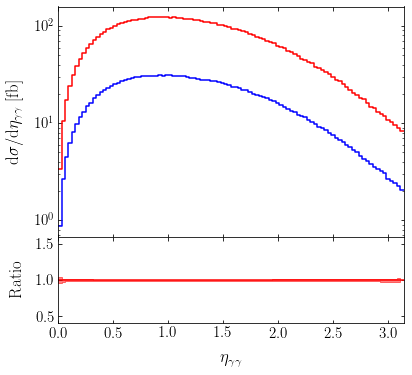

In [51]:
deta_yy_fig = deta_yy_plotter.plot(
    xlabel = '$\eta_{\gamma\gamma}$',
    ylabel = 'd$\sigma/$d$\eta_{\gamma\gamma}$ [fb]'
)

In [52]:
deta_yy_fig.savefig(save_dir + 'deta_yy.png', dpi=150, bbox_inches='tight')

## $m_{\gamma\gamma}$

In [53]:
dm_yy_file = rivet_dir + 'mass.dat'

In [54]:
dm_yy_plotter = RivetPlotter(dm_yy_file)

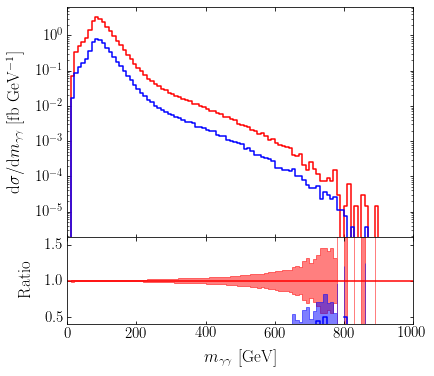

In [55]:
dm_yy_fig = dm_yy_plotter.plot(
    xlabel = '$m_{\gamma\gamma}$ [GeV]',
    ylabel = 'd$\sigma/$d$m_{\gamma\gamma}$ [fb GeV$^{-1}$]'
)

In [56]:
dm_yy_fig.savefig(save_dir + 'dm_yy.png', dpi=150, bbox_inches='tight')

# Jet plots

## $p_{T, j_1}$

In [57]:
dpt_j1_file = rivet_dir + 'j1pt.dat'

In [58]:
dpt_j1_plotter = RivetPlotter(dpt_j1_file)

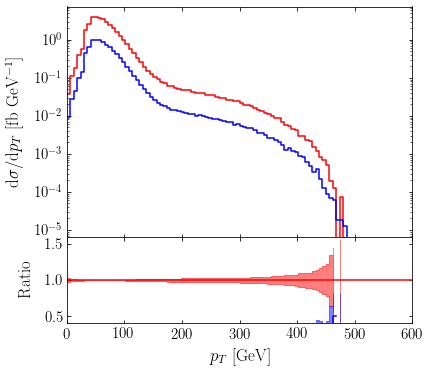

In [59]:
dpt_j1_fig = dpt_j1_plotter.plot(
    xlabel = '$p_{T}$ [GeV]',
    ylabel = 'd$\sigma/$d$p_{T}$ [fb GeV$^{-1}$]'
)

In [60]:
dpt_j1_fig.savefig(save_dir + 'dpt_j1.png', dpi=150, bbox_inches='tight')

## $p_{T, j_2}$

In [61]:
dpt_j2_file = rivet_dir + 'j2pt.dat'

In [62]:
dpt_j2_plotter = RivetPlotter(dpt_j2_file)

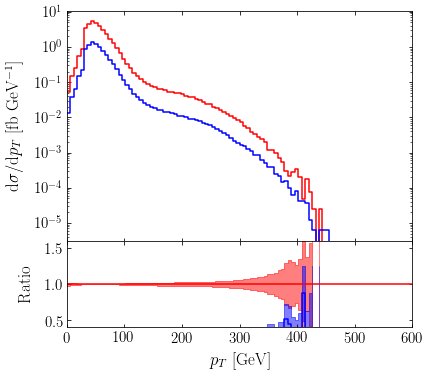

In [63]:
dpt_j2_fig = dpt_j2_plotter.plot(
    xlabel = '$p_{T}$ [GeV]',
    ylabel = 'd$\sigma/$d$p_{T}$ [fb GeV$^{-1}$]'
)

In [64]:
dpt_j2_fig.savefig(save_dir + 'dpt_j2.png', dpi=150, bbox_inches='tight')